In [1]:
# import necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create dataframe from .csv file
aud_features = pd.read_csv("p_audio_features_0-999.csv")

# drop non-numerical features
features = aud_features.drop(['Unnamed: 0', 'Unnamed: 0.1', 'type', 'id', 'uri', 'track_href','analysis_url'], axis='columns')
features.head()

,playlist_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,226864,4
1,0,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,198800,4
2,0,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,235933,4
3,0,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,267267,4
4,0,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,227600,4


In [2]:
# removing null values from dataset
features.dropna()

# additionally, removing unneccessary attributes from dataset
features = features.drop(['mode', 'time_signature', 'liveness'], axis='columns')

features_copy = features.copy()

In [3]:
# import Standard Scaler
from sklearn.preprocessing import MinMaxScaler

# conduct standard scaling on features
mm_feats = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'loudness', 'speechiness', 'tempo', 'valence']
mm = MinMaxScaler()
features_copy[mm_feats] = mm.fit_transform(features_copy[mm_feats])
features_copy.head()

,playlist_id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms
0,0,0.914980,0.813,0.363636,0.842733,0.125780,0.031225,0.007005,0.811623,0.572105,226864
1,0,0.783401,0.838,0.454545,0.893573,0.118503,0.025000,0.025126,0.925852,0.652266,198800
2,0,0.672065,0.758,0.181818,0.851050,0.218295,0.002390,0.000000,0.702405,0.452624,235933
3,0,0.902834,0.714,0.363636,0.859462,0.146570,0.201807,0.000235,0.818637,0.460435,267267
4,0,0.863360,0.606,0.000000,0.882707,0.074116,0.056325,0.000000,0.655311,0.432103,227600


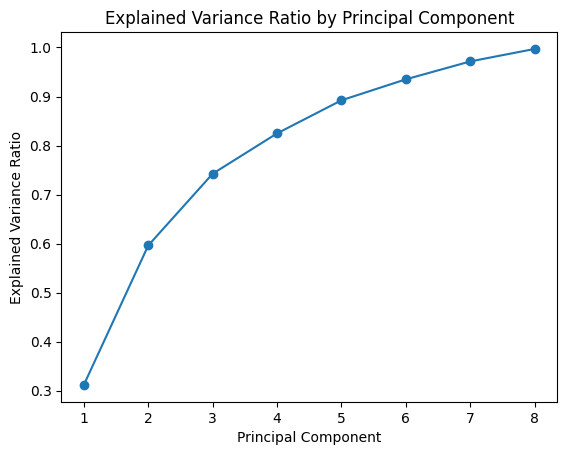

In [4]:
# conduct dimensionality reduction with PCA
from sklearn.decomposition import PCA

# create dataframe for clustering models
k_features = features_copy.loc[:, mm_feats]
data = k_features.values

ratios = []
for n in range(1, len(mm_feats)):
    pca = PCA(n_components=n)
    pca.fit_transform(data)
    ratios.append(np.sum(pca.explained_variance_ratio_))

plt.plot(range(1, len(ratios) + 1), ratios, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

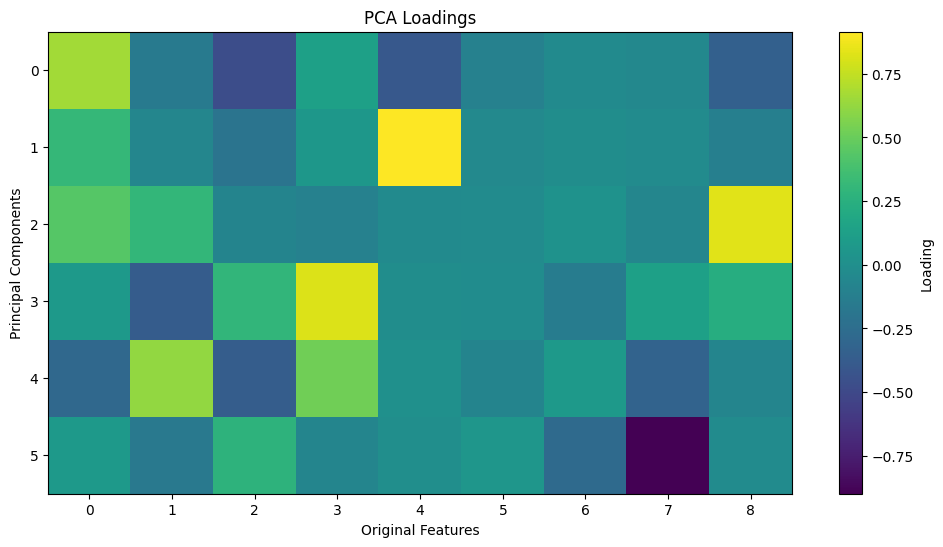

In [5]:
pca = PCA(n_components=6)
pca.fit(data)
loadings = pca.components_

plt.figure(figsize=(12, 6))
plt.imshow(loadings, cmap='viridis', aspect='auto')
plt.colorbar(label='Loading')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('PCA Loadings')
plt.show()

In [6]:
feat_importance = np.abs(loadings).sum(axis=0)
feat_ranking = np.argsort(feat_importance)[::-1]
num_selected_features = 6
selected_feats = k_features.columns[feat_ranking[:num_selected_features]]

print("Selected Features: ")
for feature in selected_feats:
    print(feature)

Selected Features: 
acousticness
instrumentalness
energy
danceability
valence
tempo


In [7]:
pca_col = ['acousticness', 'instrumentalness', 'energy', 'danceability', 'valence', 'tempo']
pca_feats = k_features.loc[:, pca_col]
pca_data = pca_feats.values

In [8]:
# import clustering models and silhoutte score
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# analyze performance of each of the models using silhoutte score
k_scores = []
b_scores = []
d_scores = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_labels = kmeans.fit_predict(pca_data)
    k_score = silhouette_score(pca_data, kmeans_labels)
    print(f"For n_clusters = {k}, Silhoutte Score is: {k_score}")
    k_scores.append(k_score)

For n_clusters = 2, Silhoutte Score is: 0.37965982335782017
For n_clusters = 3, Silhoutte Score is: 0.246807960272379
For n_clusters = 4, Silhoutte Score is: 0.25939275167194786
For n_clusters = 5, Silhoutte Score is: 0.22372862315335854
For n_clusters = 6, Silhoutte Score is: 0.22384267367390345
For n_clusters = 7, Silhoutte Score is: 0.23386016103034707
For n_clusters = 8, Silhoutte Score is: 0.2167294920706275
For n_clusters = 9, Silhoutte Score is: 0.20148641549238083
For n_clusters = 10, Silhoutte Score is: 0.18764817823679072
For n_clusters = 11, Silhoutte Score is: 0.19257981240233257


In [9]:
for k in range(2, 12):
    birch = Birch(n_clusters=k, threshold=0.3)
    birch_labels = birch.fit_predict(pca_data)
    b_score = silhouette_score(pca_data, birch_labels)
    print(f"For n_clusters = {k}, Silhoutte Score is: {b_score}")
    b_scores.append(b_score)

For n_clusters = 2, Silhoutte Score is: 0.4028132863188594
For n_clusters = 3, Silhoutte Score is: 0.3166200628740173
For n_clusters = 4, Silhoutte Score is: 0.3184483257029956
For n_clusters = 5, Silhoutte Score is: 0.3125600373516059
For n_clusters = 6, Silhoutte Score is: 0.3098116510653516
For n_clusters = 7, Silhoutte Score is: 0.2697428152740301
For n_clusters = 8, Silhoutte Score is: 0.24304014345796685
For n_clusters = 9, Silhoutte Score is: 0.2167529072967652
For n_clusters = 10, Silhoutte Score is: 0.21597643653931495
For n_clusters = 11, Silhoutte Score is: 0.21557303564755434


In [10]:
# conduct DBSCAN clustering
for sample in range(2, 12):
    dbscan = DBSCAN(eps=0.1, min_samples=sample)
    d_labels = dbscan.fit_predict(pca_data)
    d_score = silhouette_score(pca_data, d_labels)
    print(f"For n_samples = {sample}, Silhouette score is: {d_score}")
    d_scores.append(d_score)

For n_samples = 2, Silhouette score is: -0.5539470115035469
For n_samples = 3, Silhouette score is: -0.5526054259116053
For n_samples = 4, Silhouette score is: -0.544162450771503
For n_samples = 5, Silhouette score is: -0.5290179746614752
For n_samples = 6, Silhouette score is: -0.5230705733977447
For n_samples = 7, Silhouette score is: -0.5234526371263009
For n_samples = 8, Silhouette score is: -0.5081432010677615
For n_samples = 9, Silhouette score is: -0.5100882041037746
For n_samples = 10, Silhouette score is: -0.5005851182161437
For n_samples = 11, Silhouette score is: -0.49394550581420116


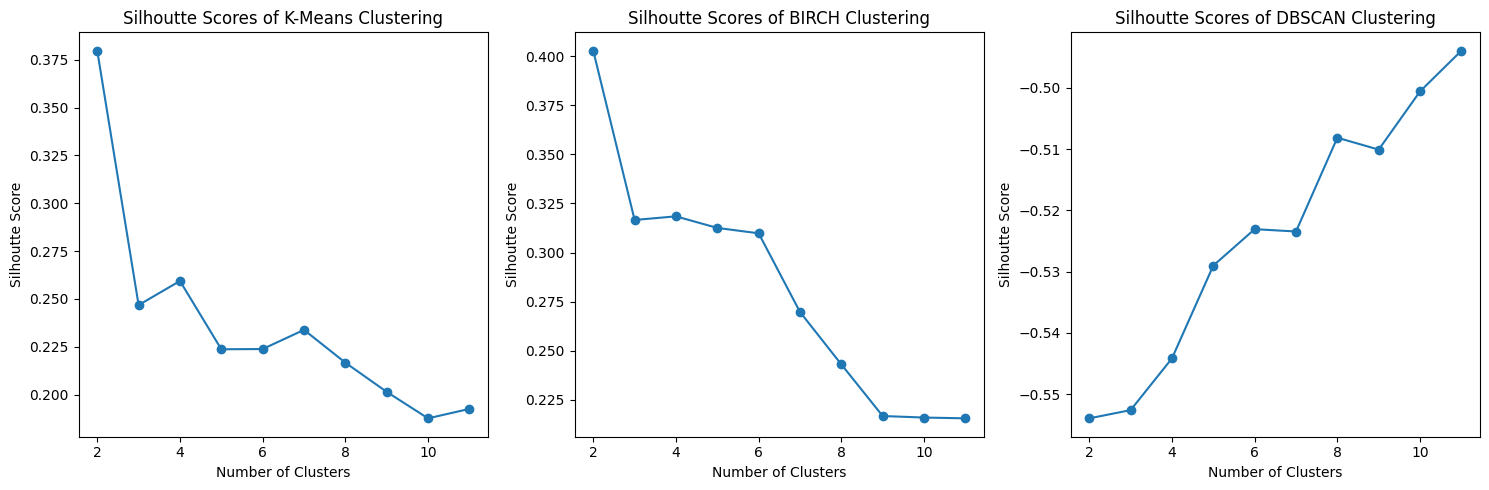

In [13]:
# visualizations of scores for each clustering model
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

axes[0].plot(range(2, 12), k_scores, marker='o')
axes[0].set_title("Silhoutte Scores of K-Means Clustering")
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("Silhoutte Score")

axes[1].plot(range(2, 12), b_scores, marker='o')
axes[1].set_title("Silhoutte Scores of BIRCH Clustering")
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Silhoutte Score")

axes[2].plot(range(2, 12), d_scores, marker='o')
axes[2].set_title("Silhoutte Scores of DBSCAN Clustering")
axes[2].set_xlabel("Number of Clusters")
axes[2].set_ylabel("Silhoutte Score")

plt.tight_layout()
plt.show()